In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import pickle
import streamlit as st

In [4]:
df = pd.read_csv('PP01_insurance.csv')

In [5]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [6]:
# Basic Information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [8]:
# Check for missing values
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [10]:
# Summary statistics
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


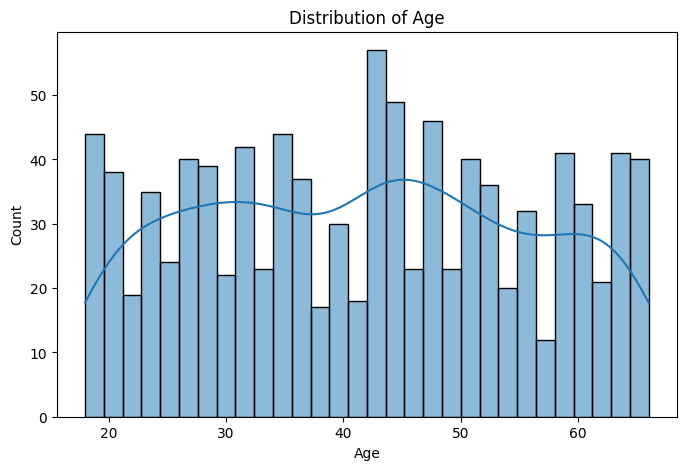

In [12]:
# Step 2.1: Distribution Analysis
# Distribution plots for numerical features
# numerical_features = ['Age', 'Height', 'Weight', 'NumberOfMajorSurgeries', 'PremiumPrice']

plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title(f'Distribution of Age')
plt.show()

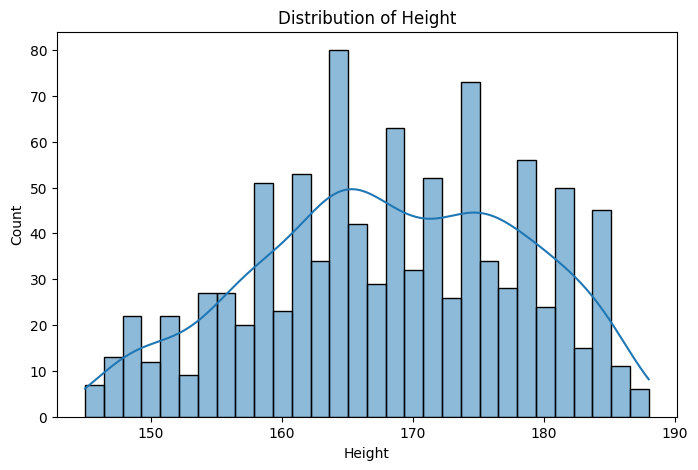

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Height'], kde=True, bins=30)
plt.title(f'Distribution of Height')
plt.show()

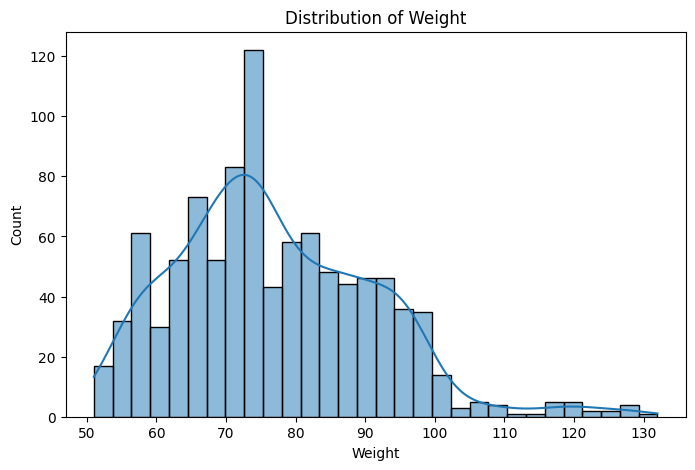

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Weight'], kde=True, bins=30)
plt.title(f'Distribution of Weight')
plt.show()

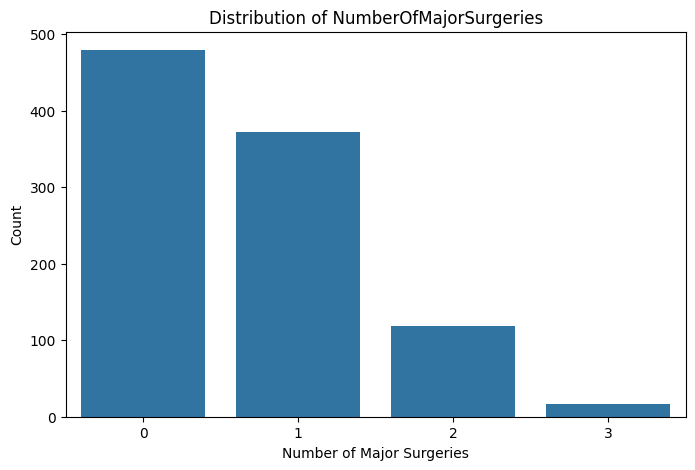

In [15]:
# Column chart for the distribution of NumberOfMajorSurgeries
plt.figure(figsize=(8, 5))
sns.countplot(x='NumberOfMajorSurgeries', data=df)
plt.title('Distribution of NumberOfMajorSurgeries')
plt.xlabel('Number of Major Surgeries')
plt.ylabel('Count')
plt.show()

In [17]:
# Create BMI feature
df['BMI'] = df['Weight'] / ((df['Height'] / 100) ** 2)

In [19]:
# Preview the updated dataframe
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969


In [21]:
# Summary statistics for BMI
print(df['BMI'].describe())

count    986.000000
mean      27.460709
std        5.878671
min       15.156281
25%       23.393392
50%       27.156602
75%       30.759870
max       50.000000
Name: BMI, dtype: float64


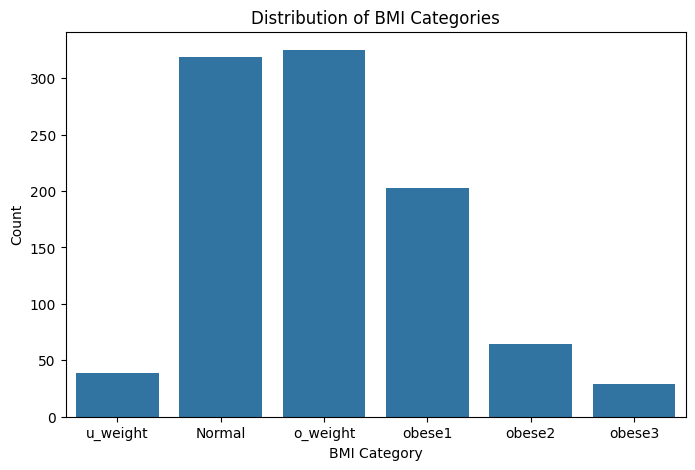

In [23]:
# Create BMI bins for better visualization
df['BMI_Binned'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.999, 29.999,34.999, 39.999, 44.999], labels=['u_weight', 'Normal', 'o_weight', 'obese1', 'obese2', 'obese3'])

# Plot column chart for BMI categories
plt.figure(figsize=(8, 5))
sns.countplot(x='BMI_Binned', data=df, order=['u_weight', 'Normal', 'o_weight', 'obese1', 'obese2', 'obese3'])
plt.title('Distribution of BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()

In [25]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,BMI_Binned
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286,Normal
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864,Normal
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033,Normal
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313,o_weight
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969,obese1


In [27]:
# Exclude BMI_Binned column from correlation analysis
correlation_matrix = df.drop(columns=['BMI_Binned']).corr()

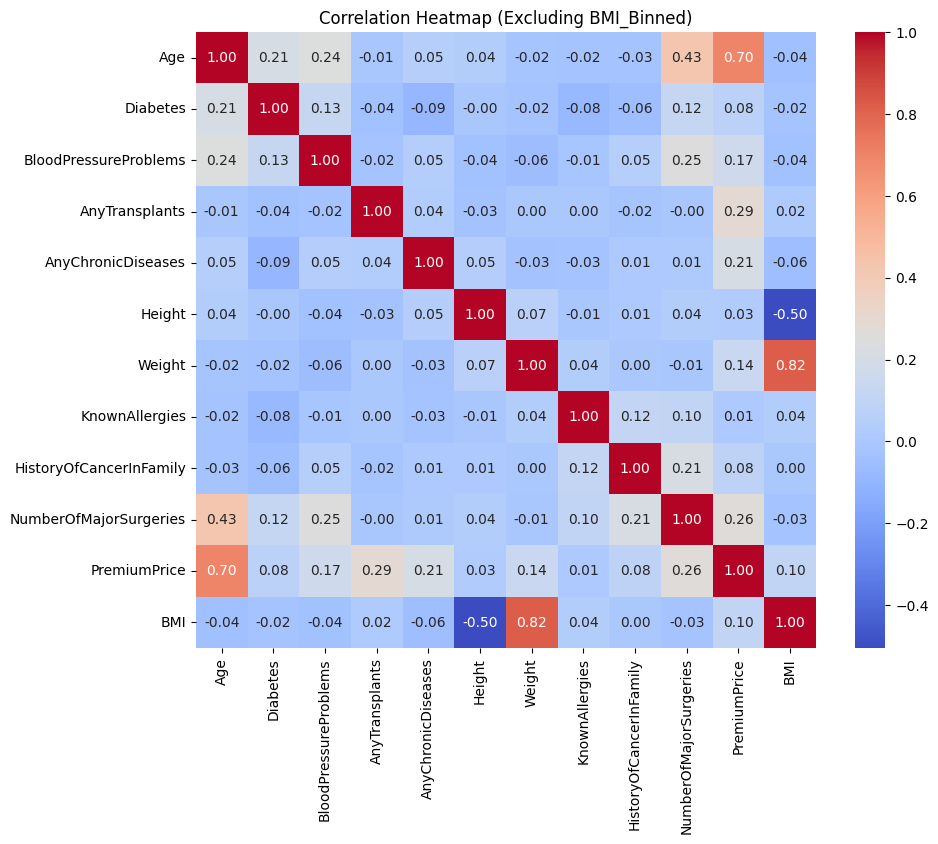

In [29]:
# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Excluding BMI_Binned)')
plt.show()

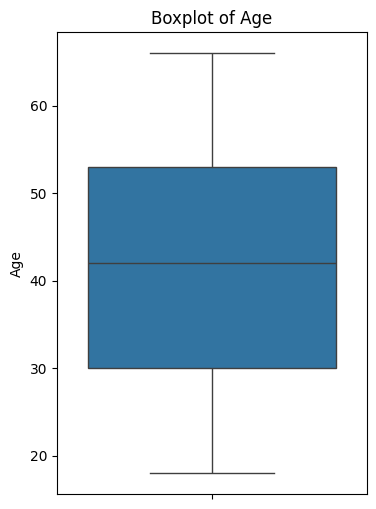

In [31]:
# Boxplot for Age
plt.figure(figsize=(4, 6))
sns.boxplot(y=df['Age'])
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

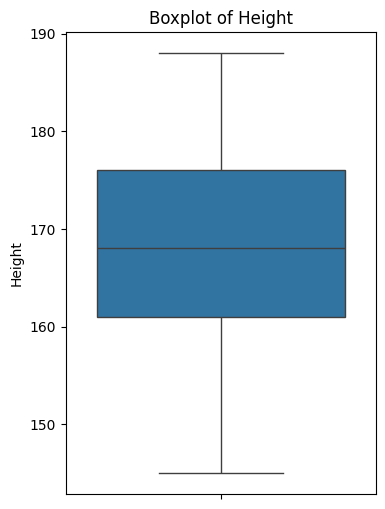

In [32]:
# Boxplot for Height
plt.figure(figsize=(4, 6))
sns.boxplot(y=df['Height'])
plt.title('Boxplot of Height')
plt.ylabel('Height')
plt.show()

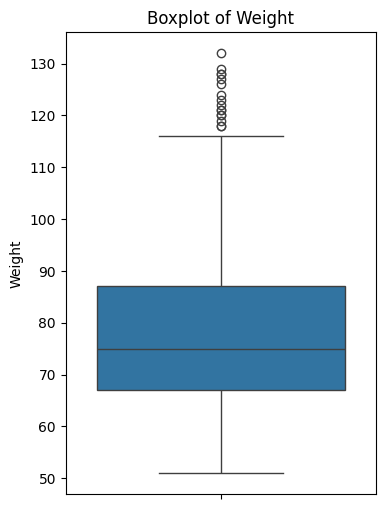

In [33]:
# Boxplot for Weight
plt.figure(figsize=(4, 6))
sns.boxplot(y=df['Weight'])
plt.title('Boxplot of Weight')
plt.ylabel('Weight')
plt.show()

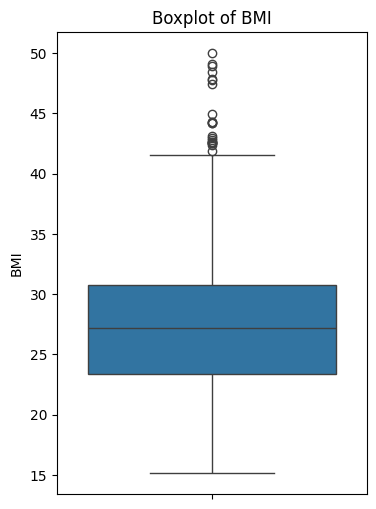

In [34]:
# Boxplot for BMI
plt.figure(figsize=(4, 6))
sns.boxplot(y=df['BMI'])
plt.title('Boxplot of BMI')
plt.ylabel('BMI')
plt.show()

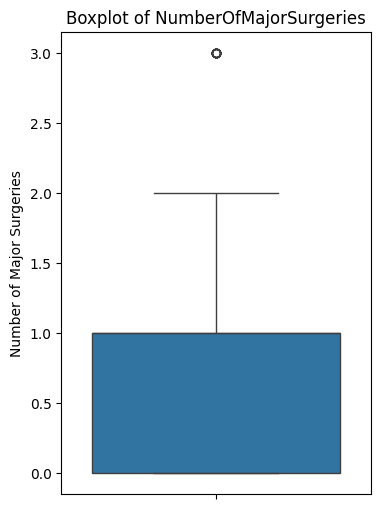

In [35]:
# Boxplot for NumberOfMajorSurgeries
plt.figure(figsize=(4, 6))
sns.boxplot(y=df['NumberOfMajorSurgeries'])
plt.title('Boxplot of NumberOfMajorSurgeries')
plt.ylabel('Number of Major Surgeries')
plt.show()

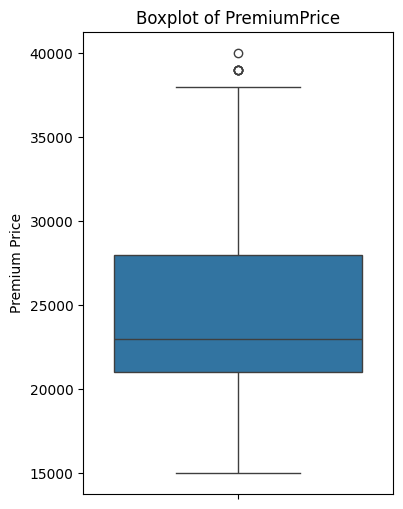

In [36]:
# Boxplot for PremiumPrice
plt.figure(figsize=(4, 6))
sns.boxplot(y=df['PremiumPrice'])
plt.title('Boxplot of PremiumPrice')
plt.ylabel('Premium Price')
plt.show()

In [38]:
df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,BMI_Binned
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286,Normal
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864,Normal
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033,Normal
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313,o_weight
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969,obese1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000,23.458562,Normal
982,64,1,1,0,0,153,70,0,0,3,28000,29.903029,o_weight
983,56,0,1,0,0,155,71,0,0,1,29000,29.552549,o_weight
984,47,1,1,0,0,158,73,1,0,1,39000,29.242109,o_weight


In [39]:
# Drop the BMI_Binned feature in place
df1=df.drop(columns=['BMI_Binned'])

In [40]:
df1

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969
...,...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000,23.458562
982,64,1,1,0,0,153,70,0,0,3,28000,29.903029
983,56,0,1,0,0,155,71,0,0,1,29000,29.552549
984,47,1,1,0,0,158,73,1,0,1,39000,29.242109


In [41]:
# List of numerical features to normalize
numerical_features = ['Age', 'Height', 'Weight', 'BMI', 'NumberOfMajorSurgeries', 'PremiumPrice']


In [43]:
# Create a Min-Max Scaler instance
scaler = MinMaxScaler()

In [44]:
# Apply Min-Max Scaling
df_normalized = df1.copy()  # Create a copy to retain the original data
df_normalized[numerical_features] = scaler.fit_transform(df[numerical_features])

In [46]:
df_normalized

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
0,0.562500,0,0,0,0,0.232558,0.074074,0,0,0.000000,0.40,0.245927
1,0.875000,1,0,0,0,0.813953,0.271605,0,0,0.000000,0.56,0.211647
2,0.375000,1,1,0,0,0.302326,0.098765,0,0,0.333333,0.32,0.243308
3,0.708333,1,1,0,1,0.883721,0.518519,0,0,0.666667,0.52,0.362017
4,0.416667,0,0,0,1,0.488372,0.456790,0,0,0.333333,0.32,0.481541
...,...,...,...,...,...,...,...,...,...,...,...,...
981,0.000000,0,0,0,0,0.558140,0.197531,0,0,0.000000,0.00,0.238272
982,0.958333,1,1,0,0,0.186047,0.234568,0,0,1.000000,0.52,0.423225
983,0.791667,0,1,0,0,0.232558,0.246914,0,0,0.333333,0.56,0.413167
984,0.604167,1,1,0,0,0.302326,0.271605,1,0,0.333333,0.96,0.404257


In [48]:
correlation_matrix = df_normalized.corr()

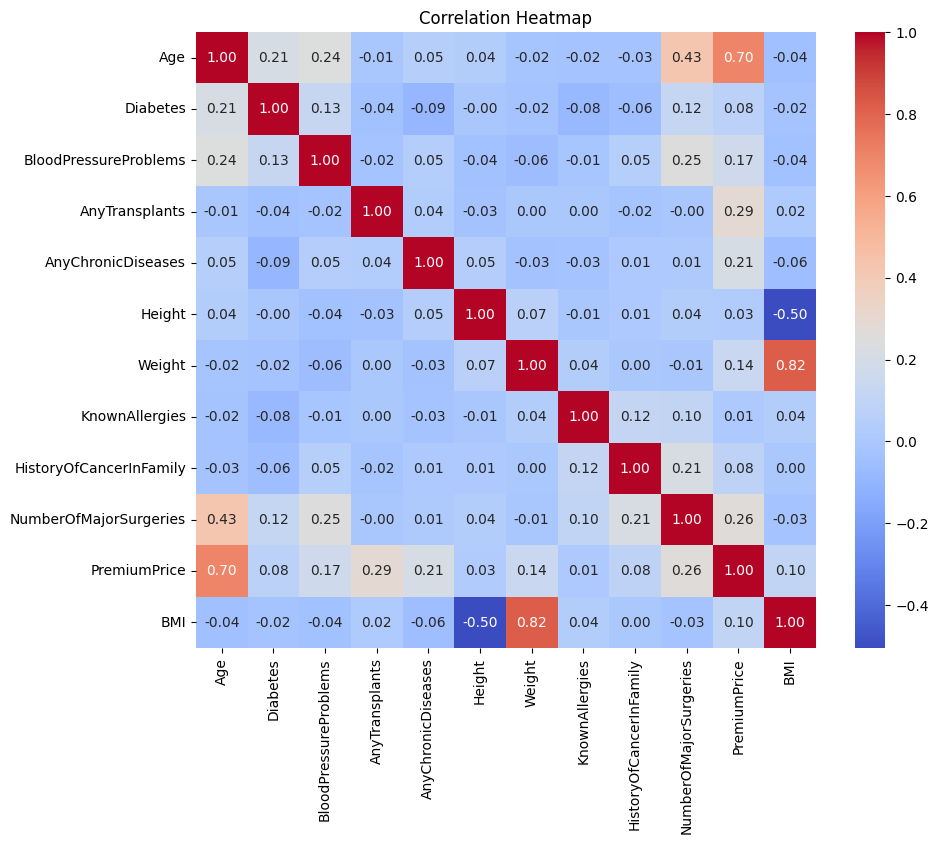

In [49]:
# Plot the normalized correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [51]:
# Move 'PremiumPrice' to the last column
target_column = 'PremiumPrice'
columns = [col for col in df_normalized.columns if col != target_column] + [target_column]
df_normalized = df_normalized[columns]

In [52]:
df_normalized

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI,PremiumPrice
0,0.562500,0,0,0,0,0.232558,0.074074,0,0,0.000000,0.245927,0.40
1,0.875000,1,0,0,0,0.813953,0.271605,0,0,0.000000,0.211647,0.56
2,0.375000,1,1,0,0,0.302326,0.098765,0,0,0.333333,0.243308,0.32
3,0.708333,1,1,0,1,0.883721,0.518519,0,0,0.666667,0.362017,0.52
4,0.416667,0,0,0,1,0.488372,0.456790,0,0,0.333333,0.481541,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...
981,0.000000,0,0,0,0,0.558140,0.197531,0,0,0.000000,0.238272,0.00
982,0.958333,1,1,0,0,0.186047,0.234568,0,0,1.000000,0.423225,0.52
983,0.791667,0,1,0,0,0.232558,0.246914,0,0,0.333333,0.413167,0.56
984,0.604167,1,1,0,0,0.302326,0.271605,1,0,0.333333,0.404257,0.96


In [54]:
# Split features and target
X = df_normalized.iloc[:, :-1]  # All columns except the target
y = df_normalized.iloc[:, -1]   # Target column

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% train, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 50-50 split for val/test


In [56]:
# Print dataset shapes
print("Training Set:", X_train.shape, y_train.shape)
print("Validation Set:", X_val.shape, y_val.shape)
print("Test Set:", X_test.shape, y_test.shape)

Training Set: (690, 11) (690,)
Validation Set: (148, 11) (148,)
Test Set: (148, 11) (148,)


In [63]:
# Step 1: Initialize the Linear Regression model
lr_model = LinearRegression()

In [65]:
# Step 2: Train the model on the training data
lr_model.fit(X_train, y_train)

LinearRegression()

In [66]:
# Step 3: Predict on the validation dataset
y_val_pred = lr_model.predict(X_val)

In [67]:
# Step 4: Evaluate the model on the validation set
mae = mean_absolute_error(y_val, y_val_pred)
rmse = mean_squared_error(y_val, y_val_pred, squared=False)
r2 = r2_score(y_val, y_val_pred)

C:\Users\VEERANNA\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [69]:
# Print the evaluation metrics
print("Validation Dataset Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Validation Dataset Performance:
Mean Absolute Error (MAE): 0.12
Root Mean Squared Error (RMSE): 0.16
R-squared (R²): 0.64


In [71]:
# Add a constant for the intercept term
X_train_const = sm.add_constant(X_train)

In [73]:
# Fit the regression model
sm_model = sm.OLS(y_train, X_train_const).fit()

In [74]:
# Print the model summary (includes adjusted R-squared)
print(sm_model.summary())


                            OLS Regression Results                            
Dep. Variable:           PremiumPrice   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     94.17
Date:                Mon, 20 Jan 2025   Prob (F-statistic):          1.50e-128
Time:                        13:08:51   Log-Likelihood:                 317.68
No. Observations:                 690   AIC:                            -611.4
Df Residuals:                     678   BIC:                            -556.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [76]:
# Create a PolynomialFeatures transformer
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

In [79]:
# Fit and transform the training data
X_train_poly = poly.fit_transform(X_train)

In [81]:
# Transform the validation and test data using the same transformer
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

In [84]:
# Print the shape of the new feature matrices
print("Original X_train shape:", X_train.shape)
print("Transformed X_train_poly shape:", X_train_poly.shape)

Original X_train shape: (690, 11)
Transformed X_train_poly shape: (690, 77)


In [85]:
X_train_poly

array([[1.        , 1.        , 1.        , ..., 0.44444444, 0.21410292,
        0.10314013],
       [0.35416667, 0.        , 1.        , ..., 0.        , 0.        ,
        0.18420735],
       [0.625     , 0.        , 0.        , ..., 0.11111111, 0.2056185 ,
        0.3805107 ],
       ...,
       [0.89583333, 1.        , 0.        , ..., 1.        , 0.29576922,
        0.08747943],
       [0.39583333, 1.        , 0.        , ..., 0.11111111, 0.05407268,
        0.02631469],
       [0.85416667, 1.        , 1.        , ..., 0.11111111, 0.19880406,
        0.3557075 ]])

In [90]:
# Get feature names from the polynomial transformation
feature_names = poly.get_feature_names_out(X_train.columns)

# Convert the first 5 rows of X_train_poly into a DataFrame
X_train_poly_df = pd.DataFrame(X_train_poly[:5], columns=feature_names)

# Display the DataFrame
print("First 5 rows of X_train_poly as a DataFrame:\n")
print(X_train_poly_df)

First 5 rows of X_train_poly as a DataFrame:

        Age  Diabetes  BloodPressureProblems  AnyTransplants  \
0  1.000000       1.0                    1.0             0.0   
1  0.354167       0.0                    1.0             0.0   
2  0.625000       0.0                    0.0             0.0   
3  0.166667       0.0                    0.0             0.0   
4  0.833333       1.0                    1.0             0.0   

   AnyChronicDiseases    Height    Weight  KnownAllergies  \
0                 0.0  0.418605  0.234568             0.0   
1                 0.0  0.558140  0.432099             0.0   
2                 1.0  0.372093  0.543210             0.0   
3                 1.0  0.906977  0.271605             0.0   
4                 0.0  0.325581  0.135802             0.0   

   HistoryOfCancerInFamily  NumberOfMajorSurgeries  ...  KnownAllergies^2  \
0                      0.0                0.666667  ...               0.0   
1                      0.0                0.0000

In [92]:
# Display all column names of X_train_poly_df
print("Column Names:\n")
print(X_train_poly_df.columns.tolist())


Column Names:

['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'BMI', 'Age^2', 'Age Diabetes', 'Age BloodPressureProblems', 'Age AnyTransplants', 'Age AnyChronicDiseases', 'Age Height', 'Age Weight', 'Age KnownAllergies', 'Age HistoryOfCancerInFamily', 'Age NumberOfMajorSurgeries', 'Age BMI', 'Diabetes^2', 'Diabetes BloodPressureProblems', 'Diabetes AnyTransplants', 'Diabetes AnyChronicDiseases', 'Diabetes Height', 'Diabetes Weight', 'Diabetes KnownAllergies', 'Diabetes HistoryOfCancerInFamily', 'Diabetes NumberOfMajorSurgeries', 'Diabetes BMI', 'BloodPressureProblems^2', 'BloodPressureProblems AnyTransplants', 'BloodPressureProblems AnyChronicDiseases', 'BloodPressureProblems Height', 'BloodPressureProblems Weight', 'BloodPressureProblems KnownAllergies', 'BloodPressureProblems HistoryOfCancerInFamily', 'BloodPressureProblems NumberOfMajorSurgeries', 'BloodPr

In [94]:
# Train Linear Regression with polynomial features
lr_poly_model = LinearRegression()
lr_poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [98]:
# Evaluate on the validation set
y_val_pred_poly = lr_poly_model.predict(X_val_poly)

In [100]:
# Compute validation metrics
mae_poly = mean_absolute_error(y_val, y_val_pred_poly)
rmse_poly = mean_squared_error(y_val, y_val_pred_poly, squared=False)
r2_poly = r2_score(y_val, y_val_pred_poly)

C:\Users\VEERANNA\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [101]:
# Print the results
print("Validation Dataset Performance with Polynomial Features:")
print(f"Mean Absolute Error (MAE): {mae_poly:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_poly:.2f}")
print(f"R-squared (R²): {r2_poly:.2f}")

Validation Dataset Performance with Polynomial Features:
Mean Absolute Error (MAE): 0.11
Root Mean Squared Error (RMSE): 0.16
R-squared (R²): 0.62


In [102]:
# Evaluate on the train set
y_train_pred_poly = lr_poly_model.predict(X_train_poly)

In [103]:
# Compute train metrics
mae_poly_train = mean_absolute_error(y_train, y_train_pred_poly)
rmse_poly_train = mean_squared_error(y_train, y_train_pred_poly, squared=False)
r2_poly_train = r2_score(y_train, y_train_pred_poly)

C:\Users\VEERANNA\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [104]:
# Print the results
print("Train Dataset Performance with Polynomial Features:")
print(f"Mean Absolute Error (MAE): {mae_poly_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_poly_train:.2f}")
print(f"R-squared (R²): {r2_poly_train:.2f}")

Train Dataset Performance with Polynomial Features:
Mean Absolute Error (MAE): 0.09
Root Mean Squared Error (RMSE): 0.13
R-squared (R²): 0.73


In [108]:
# Add a constant (intercept term) to the training data
X_train_poly_const = sm.add_constant(X_train_poly)

In [110]:
# Train the OLS model
ols_poly_model = sm.OLS(y_train, X_train_poly_const).fit()

In [112]:
# Print the summary to analyze model performance
print(ols_poly_model.summary())

                            OLS Regression Results                            
Dep. Variable:           PremiumPrice   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     23.15
Date:                Mon, 20 Jan 2025   Prob (F-statistic):          4.18e-132
Time:                        13:08:53   Log-Likelihood:                 445.36
No. Observations:                 690   AIC:                            -746.7
Df Residuals:                     618   BIC:                            -420.1
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.9032     13.982     -0.422      0.6

In [118]:
# Create PolynomialFeatures transformer with degree 2
poly_degree2 = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# Transform the datasets
X_train_poly2 = poly_degree2.fit_transform(X_train)
X_val_poly2 = poly_degree2.transform(X_val)
X_test_poly2 = poly_degree2.transform(X_test)

# Check the shape of the transformed feature matrices
print("Degree-2 Polynomial Features:")
print("X_train shape:", X_train.shape)
print("X_train_poly2 shape:", X_train_poly2.shape)

Degree-2 Polynomial Features:
X_train shape: (690, 11)
X_train_poly2 shape: (690, 77)


In [128]:
# Train Ridge Regression model
ridge_model_degree2 = Ridge(alpha=1.0)  # Adjust alpha for regularization strength
ridge_model_degree2.fit(X_train_poly2, y_train)

# Predict on the validation set
y_val_pred_ridge2 = ridge_model_degree2.predict(X_val_poly2)

# Evaluate the model
mae_ridge2 = mean_absolute_error(y_val, y_val_pred_ridge2)
rmse_ridge2 = mean_squared_error(y_val, y_val_pred_ridge2, squared=False)
r2_ridge2 = r2_score(y_val, y_val_pred_ridge2)

print("\nValidation Dataset Performance with Ridge Regression (Degree-2 Polynomial):")
print(f"Mean Absolute Error (MAE): {mae_ridge2:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge2:.2f}")
print(f"R-squared (R²): {r2_ridge2:.2f}")



Validation Dataset Performance with Ridge Regression (Degree-2 Polynomial):
Mean Absolute Error (MAE): 0.11
Root Mean Squared Error (RMSE): 0.16
R-squared (R²): 0.65


C:\Users\VEERANNA\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [130]:
# Train Lasso Regression model
lasso_model_degree2 = Lasso(alpha=0.01, max_iter=10000)  # Adjust alpha for regularization strength
lasso_model_degree2.fit(X_train_poly2, y_train)

# Predict on the validation set
y_val_pred_lasso2 = lasso_model_degree2.predict(X_val_poly2)

# Evaluate the model
mae_lasso2 = mean_absolute_error(y_val, y_val_pred_lasso2)
rmse_lasso2 = mean_squared_error(y_val, y_val_pred_lasso2, squared=False)
r2_lasso2 = r2_score(y_val, y_val_pred_lasso2)

print("\nValidation Dataset Performance with Lasso Regression (Degree-2 Polynomial):")
print(f"Mean Absolute Error (MAE): {mae_lasso2:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso2:.2f}")
print(f"R-squared (R²): {r2_lasso2:.2f}")


Validation Dataset Performance with Lasso Regression (Degree-2 Polynomial):
Mean Absolute Error (MAE): 0.15
Root Mean Squared Error (RMSE): 0.20
R-squared (R²): 0.43


C:\Users\VEERANNA\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [133]:
# Define a range of alpha values to tune
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}

# Perform GridSearchCV
ridge_cv = GridSearchCV(Ridge(), param_grid, scoring='r2', cv=5)
ridge_cv.fit(X_train_poly2, y_train)

# Best alpha and corresponding R²
print("Best alpha for Ridge:", ridge_cv.best_params_['alpha'])
print("Best R² from CV:", ridge_cv.best_score_)

# Evaluate on validation set with the best Ridge model
ridge_best = ridge_cv.best_estimator_
y_val_pred_ridge_best = ridge_best.predict(X_val_poly2)
print("Validation R² with best Ridge model:", r2_score(y_val, y_val_pred_ridge_best))

Best alpha for Ridge: 1.0
Best R² from CV: 0.6301331010170659
Validation R² with best Ridge model: 0.6488521840847078


In [140]:
# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
dt_model.fit(X_train_poly2, y_train)

# Predict on the validation set
y_val_pred_dt = dt_model.predict(X_val_poly2)

# Evaluate the model
mae_dt = mean_absolute_error(y_val, y_val_pred_dt)
rmse_dt = mean_squared_error(y_val, y_val_pred_dt, squared=False)
r2_dt = r2_score(y_val, y_val_pred_dt)

# Print validation performance
print("\nValidation Dataset Performance with Decision Tree Regressor:")
print(f"Mean Absolute Error (MAE): {mae_dt:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt:.2f}")
print(f"R-squared (R²): {r2_dt:.2f}")


Validation Dataset Performance with Decision Tree Regressor:
Mean Absolute Error (MAE): 0.07
Root Mean Squared Error (RMSE): 0.20
R-squared (R²): 0.42


C:\Users\VEERANNA\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [149]:
# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10, min_samples_split=5, min_samples_leaf=2)

# Train the Random Forest on the training data
rf_model.fit(X_train_poly2, y_train)

# Predict on the validation set
y_val_pred_rf = rf_model.predict(X_val_poly2)

# Evaluate the model
mae_rf = mean_absolute_error(y_val, y_val_pred_rf)
rmse_rf = mean_squared_error(y_val, y_val_pred_rf, squared=False)
r2_rf = r2_score(y_val, y_val_pred_rf)

# Print validation performance
print("\nValidation Dataset Performance with Random Forest Regressor:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R-squared (R²): {r2_rf:.2f}")


Validation Dataset Performance with Random Forest Regressor:
Mean Absolute Error (MAE): 0.06
Root Mean Squared Error (RMSE): 0.13
R-squared (R²): 0.76


C:\Users\VEERANNA\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [154]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV for Random Forest
rf_cv = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, scoring='r2', cv=5)
rf_cv.fit(X_train_poly2, y_train)

# Best parameters
print("Best parameters for Random Forest:", rf_cv.best_params_)

# Evaluate best model on validation set
rf_best = rf_cv.best_estimator_
y_val_pred_rf_best = rf_best.predict(X_val_poly2)
print("Validation R² with best Random Forest model:", r2_score(y_val, y_val_pred_rf_best))


Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Validation R² with best Random Forest model: 0.7701582626092223


In [158]:
y_test_pred_rf = rf_cv.best_estimator_.predict(X_test_poly2)
test_r2_rf = r2_score(y_test, y_test_pred_rf)
print(f"Test R² with best Random Forest model: {test_r2_rf:.2f}")


Test R² with best Random Forest model: 0.93


In [162]:
feature_importances = rf_cv.best_estimator_.feature_importances_
feature_names = poly_degree2.get_feature_names_out(X_train.columns)
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Top 10 Important Features:\n")
print(importance_df.head(10))

Top 10 Important Features:

                              Feature  Importance
11                              Age^2    0.303063
0                                 Age    0.291402
17                         Age Weight    0.054308
15             Age AnyChronicDiseases    0.025497
48                 AnyTransplants BMI    0.025318
43              AnyTransplants Height    0.023707
42  AnyTransplants AnyChronicDiseases    0.022113
14                 Age AnyTransplants    0.019219
19        Age HistoryOfCancerInFamily    0.017711
62                           Weight^2    0.016252


In [166]:
# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(
    n_estimators=100,   # Number of boosting stages
    learning_rate=0.1,  # Step size shrinkage
    max_depth=3,        # Maximum depth of individual trees
    random_state=42
)

# Train the model
gb_model.fit(X_train_poly2, y_train)

# Predict on the validation set
y_val_pred_gb = gb_model.predict(X_val_poly2)

# Evaluate the model
mae_gb = mean_absolute_error(y_val, y_val_pred_gb)
rmse_gb = mean_squared_error(y_val, y_val_pred_gb, squared=False)
r2_gb = r2_score(y_val, y_val_pred_gb)

# Print validation performance
print("\nValidation Dataset Performance with Gradient Boosting Regressor:")
print(f"Mean Absolute Error (MAE): {mae_gb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb:.2f}")
print(f"R-squared (R²): {r2_gb:.2f}")


Validation Dataset Performance with Gradient Boosting Regressor:
Mean Absolute Error (MAE): 0.08
Root Mean Squared Error (RMSE): 0.14
R-squared (R²): 0.73


C:\Users\VEERANNA\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [174]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
gb_cv = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1
)
gb_cv.fit(X_train_poly2, y_train)

# Best parameters and validation R²
print("Best parameters for Gradient Boosting:", gb_cv.best_params_)
print(f"Best R² from CV: {gb_cv.best_score_:.2f}")

# Evaluate the best model on the validation set
gb_best = gb_cv.best_estimator_
y_val_pred_gb_best = gb_best.predict(X_val_poly2)
r2_val_gb_best = r2_score(y_val, y_val_pred_gb_best)
print("Validation R² with best Gradient Boosting model:", r2_val_gb_best)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best R² from CV: 0.72
Validation R² with best Gradient Boosting model: 0.7293093485173696


In [178]:
y_test_pred_gb = gb_best.predict(X_test_poly2)
test_r2_gb = r2_score(y_test, y_test_pred_gb)
print(f"Test R² with best Gradient Boosting model: {test_r2_gb:.2f}")

Test R² with best Gradient Boosting model: 0.92


In [180]:
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump({'model': rf_cv.best_estimator_, 'poly_transformer': poly_degree2}, file)
print("Model and transformer saved together!")

Model and transformer saved together!
